### Загружаем нужные для работы библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Загружаем данные

In [2]:
taxi = pd.read_csv('3_taxi_peru.csv', sep = ';', parse_dates=['start_at', 'end_at', 'arrived_at'])
taxi.head()

journey_id                           user_id  \
0  23a1406fc6a11d866e3c82f22eed4d4c  0e9af5bbf1edfe591b54ecdfd7e91e26   
1  dd2af4715d0dc16eded53afc0e243577  a553c46e3a22fb9c326aeb3d72b3334e   
2  dd91e131888064bf7df3ce08f3d4b4ad  a553c46e3a22fb9c326aeb3d72b3334e   
3  dd2af4715d0dc16eded53afc0e2466d0  a553c46e3a22fb9c326aeb3d72b3334e   
4  85b7eabcf5d84e42dc7629b7d27781af  56772d544fdfa589a020a1ff894a86f7   

                          driver_id                           taxi_id  \
0  583949a89a9ee17d19e3ca4f137b6b4c  b12f4f09c783e29fe0d0ea624530db56   
1                               NaN                               NaN   
2                               NaN                               NaN   
3                               NaN                               NaN   
4  d665fb9f75ef5d9cd0fd89479380ba78  0accdd3aa5a322f4129fa20b53278c69   

        icon start_type            start_at     start_lat     start_lon  \
0  executive       asap 2010-11-16 16:44:00  -12,13983536  -77,02355957   
1  executive       asap 2010-06-01 00:34:00  -12,13874817  -76,99536133   
2  executive       asap 2010-05-31 05:01:00  -12,12453079  -77,02780151   
3  executive       asap 2010-06-01 00:29:00  -12,13885117  -76,99530029   
4  executive   reserved 2010-09-11 23:55:00  -12,08995438  -76,92626953   

               end_at       end_lat       end_lon  end_state driver_start_lat  \
0 2010-11-16 17:29:00  -12,05537033   -77,0413208   drop off     -12,10825481   
1 2010-06-01 00:37:00  -12,12465668  -77,02886963  not found              NaN   
2 2010-05-31 05:04:00  -12,13883209  -76,99530029  not found              NaN   
3 2010-06-01 00:32:00  -12,12458801  -77,02896118  not found              NaN   
4 2010-09-12 01:07:00  -12,02223206  -77,10638428   drop off     -12,08311558   

  driver_start_lon          arrived_at  source  driver_score  rider_score  
0      -77,0272739 2010-11-16 17:02:00  iPhone           5.0          5.0  
1              NaN                 NaT  iPhone           NaN          NaN  
2              NaN                 NaT  iPhone           NaN          NaN  
3              NaN                 NaT  iPhone           NaN          NaN  
4      -76,9277072 2010-09-11 23:50:00  iPhone           4.0          5.0

### Смотрим с какой платформы было сделано больше всего заказов

In [46]:
journey_by_platform = taxi.groupby('source').agg({'user_id':'count'}).rename(columns={'user_id':'journey_count'})

journey_by_platform.sort_values('journey_count', ascending=False)

journey_count
source                
iPhone            9741
web               7631
Android           4909
iPad               571
Wap                136

In [32]:
orders_percent = round(((journey_by_platform.journey_count.max() / journey_by_platform.journey_count.sum())*100),0)

print(f'Самая популярная платформа: {journey_by_platform.idxmax().item()}\n\
С неё было совершено {orders_percent}% заказов')

Самая популярная платформа: iPhone
С неё было совершено 42.0% заказов


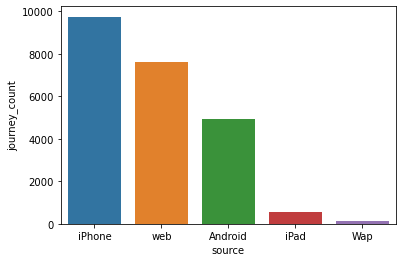

In [39]:
# для наглядности строим график
journey_by_platform = journey_by_platform.reset_index()
journey_by_platform = journey_by_platform.sort_values('journey_count', ascending=False)
ax = sns.barplot(x='source', y='journey_count',data=journey_by_platform)

### Смотрим какой тип поездки (icon) встречается чаще всего

D:\WORK\Python\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='icon', ylabel='count'>

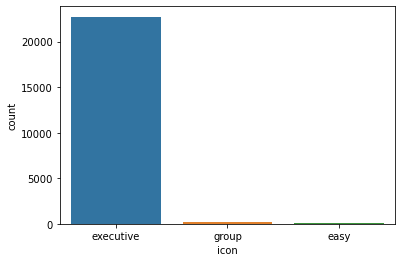

In [41]:
sns.countplot(taxi['icon'])

### Смотрим на распределение оценок водителей

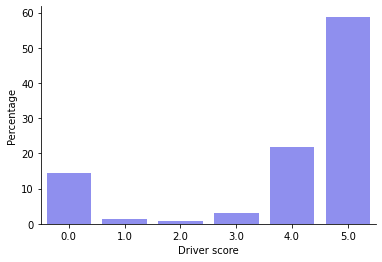

In [42]:
# Считаем кол-во оценок по каждому водителю и переводим полученные значения в проценты

driver_score_counts = taxi.driver_score.value_counts(normalize=True).mul(100).round(2).reset_index().rename(columns={'index':'driver_score', 'driver_score':'percentage'}).sort_values('driver_score', ascending=True)

ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

### Смотрим на распределение оценок пассажиров 

In [44]:
riders_score_counts = taxi.rider_score.value_counts(normalize=True).mul(100).round(2).reset_index().rename(columns={'index':'rider_score', 'rider_score':'percentage'}).sort_values('rider_score', ascending=True)

riders_score_counts

rider_score  percentage
2          0.0        2.29
4          1.0        0.21
5          2.0        0.19
3          3.0        1.38
1          4.0        8.83
0          5.0       87.10

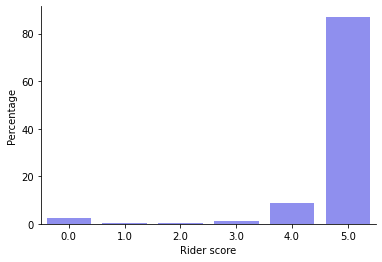

In [45]:
# Считаем кол-во оценок по каждому пассажиру и переводим полученные значения в проценты

ax = sns.barplot(x='rider_score', y='percentage', data=riders_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

### Вычисляем время ожидания машины и находим id водителя, который опаздывал чаще всего

In [4]:
taxi['wait_time'] = (taxi['arrived_at'] - taxi['start_at']).astype('timedelta64[m]')

taxi['wait_time'].head()

0    18.0
1     NaN
2     NaN
3     NaN
4    -5.0
Name: wait_time, dtype: float64

In [7]:
# смотреть будем по зарезервированным (reserved) заказам

taxi.query("(wait_time > 0.0) & (start_type == 'reserved')")\
    .groupby('driver_id')\
    .agg({'driver_id':'count'}, as_index=False)\
    .rename(columns={'driver_id':'driver_late_count'})\
    .sort_values('driver_late_count', ascending=False).head(1)

driver_late_count
driver_id                                          
406921adcca37705ef527b4246c0cfea                 67

### Смотрим распределение заказов по дням и месяцам

In [14]:
# сначала достаем месяц и день из колонки start_at (начало заказа)

taxi['month'] = taxi['start_at'].dt.month_name()
taxi['weekday'] = taxi['start_at'].dt.day_name()
taxi[['month','weekday']].head()

month   weekday
0   November   Tuesday
1       June   Tuesday
2        May    Monday
3       June   Tuesday
4  September  Saturday

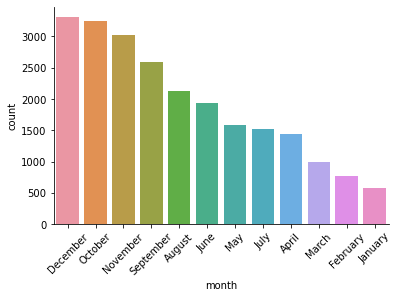

In [31]:
# строим график распределение заказов по месяцам (от большего к меньшему)

sns.countplot(x='month',data=taxi, order = taxi['month'].value_counts().index)
plt.xticks(rotation=45)
sns.despine()

D:\WORK\Python\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


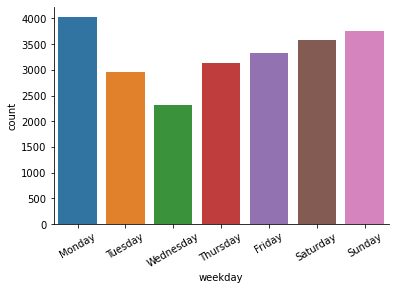

In [32]:
# А теперь – график по дням недели

taxi['weekday'].unique()
sns.countplot(taxi['weekday'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xticks(rotation=30)
sns.despine()

### Теперь расчитываем MAU

In [24]:
# Считаем уникальных пользователей по месяцам (MAU)

nunique_users = taxi.groupby('month')\
                    .nunique()[['user_id']]\
                    .rename(columns={'user_id':'user_id_count'})\
                    .sort_values('user_id_count')
nunique_users

user_id_count
month                   
January              102
February             111
March                163
April                254
May                  275
June                 309
July                 318
August               377
September            416
October              437
November             504
December             569

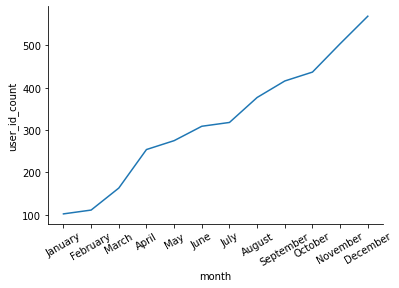

In [33]:
# И строим график для наглядности

sns.lineplot(x = nunique_users.index, y=nunique_users['user_id_count'])
plt.xticks(rotation=30)
sns.despine()

### Из графика видно, что на протяжении всего года число уникальных пользователей растет